In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [62]:
train = pd.read_csv(r"G:\traindata\rxdata\rx_monthsale.csv")

In [63]:
train.head()

,months,money
0,2018-01-01,2.007902e+08
1,2018-02-01,7.794189e+07
2,2018-03-01,1.678299e+08
3,2018-04-01,1.420252e+08
4,2018-05-01,2.159922e+08


In [64]:
# train['months'] = pd.to_datetime(train['months'])
train.head(20)
# train['months'] = pd.to_datetime(train['months'])
# train = train.groupby('months')

,months,money
0,2018-01-01,2.007902e+08
1,2018-02-01,7.794189e+07
2,2018-03-01,1.678299e+08
3,2018-04-01,1.420252e+08
4,2018-05-01,2.159922e+08
5,2018-06-01,1.870840e+08
6,2018-07-01,1.911866e+08
7,2018-08-01,2.192467e+08
8,2018-09-01,2.229234e+08
9,2018-10-01,2.279738e+08


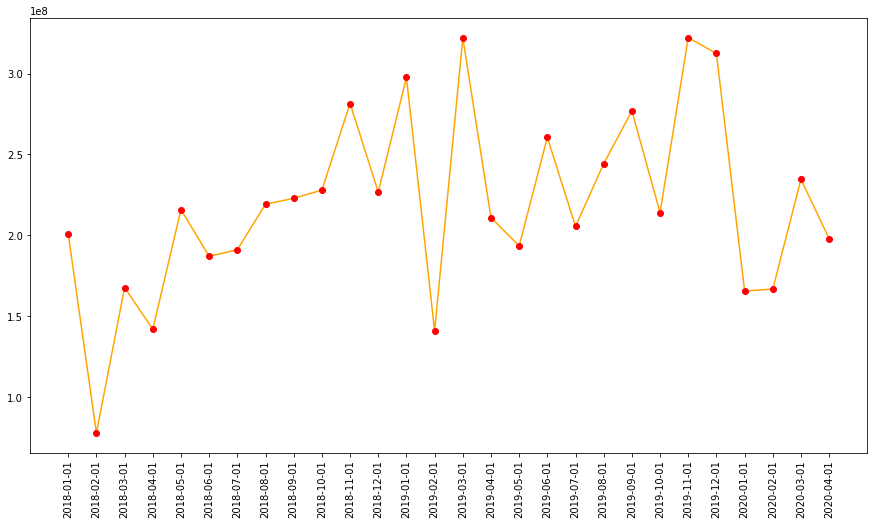

In [65]:
import matplotlib.pyplot as plt
# sorted(train['months'])
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
ax.plot(train['months'],train['money'],c="orange",label= "Data")
ax.plot(train['months'],train['money'],'ro')
plt.xticks(rotation=90)
# plt.plot(X,y,"ro")
# plt.plot(range(len(yhat)),sorted(yhat),c="red",label = "Predict")
# plt.legend()
plt.show()

In [66]:
train  = pd.DataFrame(train)

In [67]:
X = train['months']
X = X.apply(pd.to_datetime)
# X = X.values.reshape(-1,1)
X = X.map(dt.datetime.toordinal)
X = X.values.reshape(-1, 1)

In [100]:
y = train.iloc[:,-1]
# y.head(10)
y = y.values.reshape(-1, 1)

In [69]:
# scaler = MinMaxScaler() #实例化
# scaler = scaler.fit(y) #fit，在这里本质是生成min(x)和max(x)
# result = scaler.transform(y) #通过接口导出结果
# result
# y = result

In [70]:
# scaler = StandardScaler()
# result = scaler.fit_transform(y)
# result 
# y = result

In [71]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=445)

In [173]:
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(degree=5,include_bias=False)#添加多项式回归，增加拟合程度
Xtrain_poly = poly.fit_transform(Xtrain)#分别对训练集和测试集进行处理
Xtest_poly = poly.fit_transform(Xtest)#
X_poly = poly.fit_transform(X)
model = LinearRegression(normalize=True).fit(Xtrain_poly,Ytrain)

In [174]:
j = model.score(Xtest_poly,Ytest)
j

-0.2761370503533489

In [170]:
model = LinearRegression(normalize=True).fit(Xtrain_poly,Ytrain)
j = model.score(Xtest_poly,Ytest)
y_pre = model.predict(Xtest_poly)
Y_pre = model.predict(X_poly)

In [171]:
y_hat= reg.predict(X)

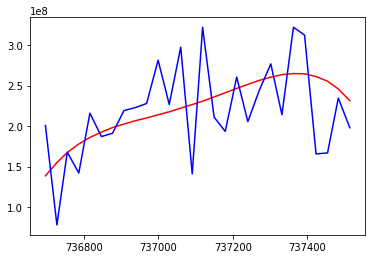

In [172]:
plt.plot(X,Y_pre,'r-')
plt.plot(X,y,'b-')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

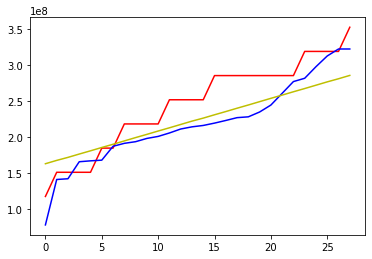

In [76]:
plt.plot(range(len(Y_pre)),sorted(Y_pre),'r-',label = 'predict')
plt.plot(range(len(y)),sorted(y),'b-',label = 'data')
plt.plot(range(len(y_hat)),sorted(y_hat),'y-',label = 'predict')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

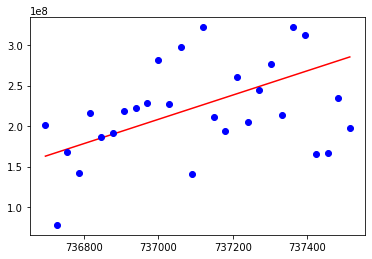

In [77]:
plt.plot(X,y_hat,'r-')
plt.plot(X,y,'bo')
plt.show

In [78]:
reg = LinearRegression().fit(Xtrain,Ytrain)
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
y_predict =reg.predict(Xtest)
y_predict

array([[2.85454332e+08],
       [1.85424075e+08],
       [2.76496398e+08],
       [2.49025402e+08],
       [2.67239867e+08],
       [2.17374038e+08],
       [2.71868133e+08],
       [2.44397137e+08],
       [2.08266805e+08]])

In [80]:
reg.score(Xtrain,Ytrain)

0.356684329104905

In [81]:
reg.score(Xtest,Ytest)

-0.7957869435076913

In [82]:
from sklearn.metrics import r2_score
r2_score(Ytest,y_predict)

-0.7957869435076914

In [83]:
r2_score(Ytest,y_pre)

-1.7399524063425424

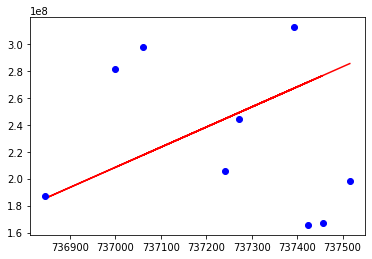

In [84]:
plt.plot(Xtest,y_predict,'r-')
plt.plot(Xtest,Ytest,'bo')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

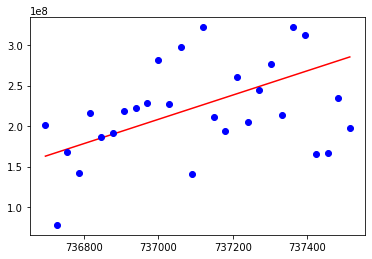

In [147]:
y_hat = reg.predict(X)
plt.plot(X,y_hat,'r-')
plt.plot(X,y,'bo')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

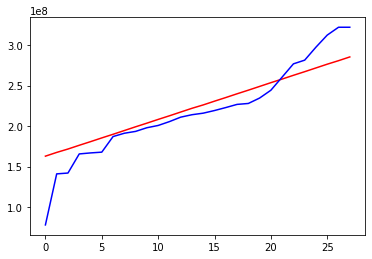

In [87]:
plt.plot(range(len(y_hat)),sorted(y_hat),'r-',label = 'predict')
plt.plot(range(len(y)),sorted(y),'b-',label = 'data')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

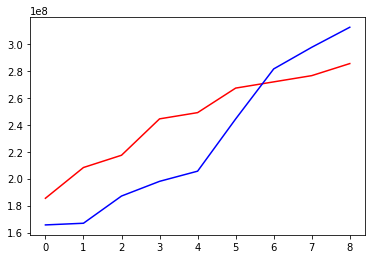

In [88]:
plt.plot(range(len(y_predict)),sorted(y_predict),'r-',label = 'predict')
plt.plot(range(len(Ytest)),sorted(Ytest),'b-',label = 'data')
plt.show

In [148]:
reg_coef = reg.coef_     #截距
reg_intercept = reg.intercept_ #斜率
X_test = pd.DataFrame(np.array([
   ['2020-07-21'],], dtype='datetime64[ns]'))
X_test.columns = ["Date"]
X_test['Date'] = pd.to_datetime(X_test['Date'])
X_test['Date']=X_test['Date'].map(dt.datetime.toordinal)
X_test['Date']

0    737627
Name: Date, dtype: int64

In [149]:
prediction = reg_coef*int(X_test['Date'])+reg_intercept
prediction

array([[3.02026509e+08]])

In [150]:
mod_coef = model.coef_     #截距
mod_coef

array([[ 4.01796526e+17, -6.82771470e+11,  7.38660218e+03,
         1.23924557e+00, -1.34777381e-06,  4.57140326e-13]])

In [151]:
mod_intercept = model.intercept_ #斜率
mod_intercept

In [175]:
test= pd.read_excel(r"G:\traindata\rxdata\rx_test.xlsx")
test =pd.DataFrame(test)
pre_month = test['months']
pre_month = pre_month.apply(pd.to_datetime)
pre_month = pre_month.map(dt.datetime.toordinal)
pre_month = pre_month.values.reshape(-1, 1)
pre_month
pre_month_poly = poly.fit_transform(pre_month.reshape(-1,1))
pre_month_poly
y_predict = model.predict(pre_month_poly)
y_predict

array([[ 1.55451392e+08],
       [ 1.46800640e+08],
       [ 1.15212288e+08],
       [ 6.59292160e+07],
       [ 8.78182400e+06],
       [-6.13416960e+07],
       [-1.40640256e+08]])

In [152]:
# X_test = pd.DataFrame(np.array([
#    ['2020-07-01'],], dtype='datetime64[ns]'))
# X_test.columns = ["Date"]
# X_test['Date'] = pd.to_datetime(X_test['Date'])
# X_test['Date']=X_test['Date'].map(dt.datetime.toordinal)
# X_test['Date']

0    737607
Name: Date, dtype: int64

In [153]:
# X_input = X_test['Date'].apply(pd.to_datetime)
# # X = X.values.reshape(-1,1)
# X_input = X_input.map(dt.datetime.toordinal)
# X_input =X_input.values.reshape(-1, 1)

In [154]:
# X_input = poly.fit_transform(X_input.reshape(-1,1))
# X_input

array([[7.19163000e+05, 5.17195421e+11, 3.71947810e+17, 2.67491103e+23,
        1.92369704e+29, 1.38345174e+35]])

In [155]:
# y_predict = model.predict(X_input)
# y_predict

array([[-1.48203415e+15]])

In [156]:
from sklearn.preprocessing import KBinsDiscretizer

enc = KBinsDiscretizer(n_bins=2,encode = "onehot")
X_bineed = enc.fit_transform(X)

In [157]:
pd.DataFrame(X_bineed.toarray())

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


In [158]:
linear = LinearRegression().fit(X_bineed,y)

In [159]:
y_fenxiang=linear.predict(X_bineed)#Xtest)

<function matplotlib.pyplot.show(*args, **kw)>

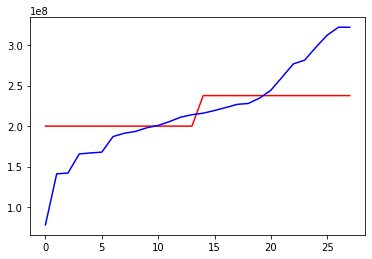

In [160]:
plt.plot(range(len(y_fenxiang)),sorted(y_fenxiang),'r-',label = 'predict')
plt.plot(range(len(y)),sorted(y),'b-',label = 'data')
plt.show

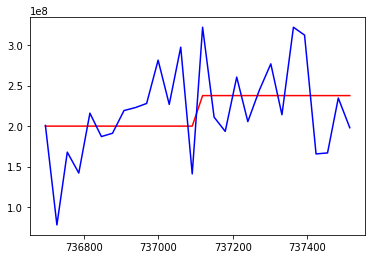

In [161]:
plt.plot(X,y_fenxiang,'r-')
plt.plot(X,y,'b-')
plt.show()

In [162]:
linear.score(X_bineed,y)

0.11087999205758192